#Imports

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

#Part 1.1 Data Collection (API)

##Getting NCVS Select Personal Victimization Data

In [ ]:
url='https://data.ojp.usdoj.gov/resource/gcuy-rt5g.csv?$limit=2000000'
res = requests.get(url)

In [ ]:
res.status_code

200

In [ ]:
res.text[:1000]

'"idper","yearq","year","ager","sex","hispanic","race","race_ethnicity","hincome1","hincome2","marital","popsize","region","msa","locality","educatn1","educatn2","veteran","citizen","newcrime","newoff","seriousviolent","notify","vicservices","locationr","direl","weapon","weapcat","injury","serious","treatment","offenderage","offendersex","offtracenew","wgtviccy","series","newwgt"\n"210176836193319999999923301","2004.1","2004","2","2","2","2","2","1","-1","1","1","3","3","-1","4","4","-2","-1","1","4","2","1","2","2","1","2","0","0","1","0","3","1","-1","1952.97373","1","1952.97373"\n"254207015147069329204211203","2009.1","2009","1","1","2","1","1","7","-1","1","1","1","2","-1","4","4","-2","-1","1","2","1","1","2","3","4","1","2","0","1","0","5","1","-1","5570.68773","1","5570.68773"\n"210313595043196799999912102","2004.1","2004","4","1","2","1","1","5","-1","2","0","1","2","-1","4","5","-2","-1","1","4","2","2","2","3","3","2","0","0","1","0","4","1","-1","3366.95748","1","3366.95748"

In [ ]:
text=StringIO(res.content.decode('utf-8'))
df=pd.read_csv(text)
df.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,2,2,2,2,2,1,-1,...,0,0,1,0,3,1,-1,1952.97373,1,1952.97373
1,254207015147069329204211203,2009.1,2009,1,1,2,1,1,7,-1,...,2,0,1,0,5,1,-1,5570.68773,1,5570.68773
2,210313595043196799999912102,2004.1,2004,4,1,2,1,1,5,-1,...,0,0,1,0,4,1,-1,3366.95748,1,3366.95748
3,252018211553075329282015501,2011.4,2011,3,1,1,1,6,5,-1,...,0,0,1,0,88,1,-1,6991.56061,1,6991.56061
4,210376205057919299999921201,2004.1,2004,2,1,2,1,1,6,-1,...,0,1,3,1,3,3,-1,2834.64905,1,2834.64905


In [ ]:
df.to_csv("./victim.csv")

In [ ]:
!mkdir /content/drive/MyDrive/stats/
!cp '/content/victim.csv'  '/content/drive/MyDrive/stats/'

mkdir: cannot create directory ‘/content/drive/MyDrive/stats/’: File exists


##Getting NCVS Select Personal Population

In [ ]:
url='https://data.ojp.usdoj.gov/resource/r4j4-fdwx.csv?$limit=2000000'
res = requests.get(url)

In [ ]:
res.status_code

200

In [ ]:
res.text[:1000]

'"idper","yearq","year","ager","sex","hispanic","race","race_ethnicity","hincome1","hincome2","marital","popsize","region","msa","locality","educatn1","educatn2","veteran","citizen","wgtpercy"\n"204182769930938799999916201","2001.4","2001","6","2","2","1","1","88","-1","4","1","1","3","-1","4","-1","-2","-1","1938.505545"\n"204182769936530499999916201","2001.4","2001","5","1","2","1","1","7","-1","1","1","4","1","-1","5","-1","-2","-1","1085.292835"\n"204182769936628799999926201","2001.4","2001","3","2","2","1","1","88","-1","2","1","1","2","-1","5","-1","-2","-1","1065.50968"\n"204182809902538799999916201","2001.4","2001","4","2","1","1","6","6","-1","2","5","1","1","-1","5","-1","-2","-1","0"\n"204182809902538799999916202","2001.4","2001","4","1","1","1","6","6","-1","2","5","1","1","-1","5","-1","-2","-1","1321.547525"\n"204183318330882099999915501","2001.4","2001","5","2","2","1","1","5","-1","2","1","4","2","-1","4","-1","-2","-1","1099.93928"\n"204183318330882099999915502","2001.

In [ ]:
text=StringIO(res.content.decode('utf-8'))
df=pd.read_csv(text)
df.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,6,2,2,1,1,88,-1,4,1,1,3,-1,4,-1,-2,-1,1938.505545
1,204182769936530499999916201,2001.4,2001,5,1,2,1,1,7,-1,1,1,4,1,-1,5,-1,-2,-1,1085.292835
2,204182769936628799999926201,2001.4,2001,3,2,2,1,1,88,-1,2,1,1,2,-1,5,-1,-2,-1,1065.509680
3,204182809902538799999916201,2001.4,2001,4,2,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,0.000000
4,204182809902538799999916202,2001.4,2001,4,1,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,1321.547525


In [ ]:
df.to_csv("./pop.csv")

In [ ]:
!cp '/content/pop.csv'  '/content/drive/MyDrive/stats/'

##Getting NIBRS Reported offense count data (FBI)

In [ ]:
api_key = "TZyOeaaT1X2aSrArHkUPHfSvhfrafm5ACefChNWC"

###Getting states

In [ ]:
states_url = f"https://api.usa.gov/crime/fbi/sapi/api/agencies?API_KEY={api_key}"
res = requests.get(states_url)
res.status_code

200

In [ ]:
states_data = res.json()

In [ ]:
type(states_data)

dict

In [ ]:
states_df = pd.DataFrame(columns=["state_name", "state_abbr"])
states_df.head()

,state_name,state_abbr


In [ ]:
for v1 in states_data.values():
  print(v1)
  for v2 in v1.values():
    states_df = states_df.append({k: v2[k] for k in ["state_name", "state_abbr"] if k in v2},ignore_index=True)
    break

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'CO0190000': {'ori': 'CO0190000', 'agency_name': "Eagle County Sheriff's Office", 'agency_type_name': 'County', 'state_name': 'Colorado', 'state_abbr': 'CO', 'division_name': 'Mountain', 'region_name': 'West', 'region_desc': 'Region IV', 'county_name': 'EAGLE', 'nibrs': True, 'latitude': 39.630638, 'longitude': -106.692944, 'nibrs_start_date': '01/01/1997'}, 'CO0150100': {'ori': 'CO0150100', 'agency_name': 'Delta Police Department', 'agency_type_name': 'City', 'state_name': 'Colorado', 'state_abbr': 'CO', 'division_name': 'Mountain', 'region_name': 'West', 'region_desc': 'Region IV', 'county_name': 'DELTA', 'nibrs': True, 'latitude': 38.74036, 'longitude': -108.072365, 'nibrs_start_date': '01/01/2012'}, 'CO0450400': {'ori': 'CO0450400', 'agency_name': 'Fowler Police Department', 'agency_type_name': 'City', 'state_name': 'Colorado', 'state_abbr': 'CO', 'division_name': 'Mountain', 'region_name': 'West', 'region_desc': 'Region IV', 'county_name': 'OTERO', 'nibrs': True, 'latitude': 38.1

In [ ]:
states_df.head()

,state_name,state_abbr
0,Hawaii,HI
1,Delaware,DE
2,Puerto Rico,PR
3,Texas,TX
4,Massachusetts,MA


In [ ]:
states_df.count()

state_name    54
state_abbr    54
dtype: int64

In [ ]:
states_df.to_csv("./states.csv")

In [ ]:
!cp '/content/states.csv'  '/content/drive/MyDrive/stats/'

###Getting FBI data

In [ ]:
states_abbr = states_df["state_abbr"].tolist()

In [ ]:
offenses = "aggravated-assault,all-other-larceny,all-other-offenses,animal-cruelty,arson,assisting-or-promoting-prostitution,bad-checks,betting,bribery,burglary-breaking-and-entering,counterfeiting-forgery,credit-card-automated-teller-machine-fraud,destruction-damage-vandalism-of-property,driving-under-the-influence,drug-equipment-violations,drug-violations,drunkenness,embezzlement,extortion-blackmail,false-pretenses-swindle-confidence-game,fondling,gambling-equipment-violation,hacking-computer-invasion,human-trafficking-commerical-sex-acts,human-trafficking-commerical-involuntary-servitude,identity-theft,impersonation,incest,intimidation,justifiable-homicide,kidnapping-abduction,motor-vehicle-theft,murder-and-nonnegligent-manslaughter,negligent-manslaughter,operating-promoting-assiting-gambling,curfew-loitering-vagrancy-violations,peeping-tom,pocket-picking,pornography-obscence-material,prostitution,purchasing-prostitution,purse-snatching,rape,robbery,sexual-assult-with-an-object,sex-offenses-non-forcible,shoplifting,simple-assault,sodomy,sports-tampering,statutory-rape,stolen-property-offenses,theft-from-building,theft-from-coin-operated-machine-or-device,theft-from-motor-vehicle,theft-of-motor-vehicle-parts-or-accessories,theft-from-motor-vehicle,weapon-law-violation,welfare-fraud,wire-fraud,not-specified,liquor-law-violations,crime-against-person,crime-against-property,crime-against-society,assault-offenses,homicide-offenses,human-trafficking-offenses,sex-offenses,sex-offenses-non-forcible,fraud-offenses,larceny-theft-offenses,drugs-narcotic-offenses,gambling-offenses,prostitution-offenses,all-offenses"
offenses = offenses.split(",")
len(offenses)

76

In [ ]:
def build_fbi_url(state: str, offense: str):
  return f'https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/{offense}/offender/states/{state}/COUNT?API_KEY={api_key}'


In [ ]:
fbi_df = pd.DataFrame(columns=["state", "offense", "year", "count"])
fbi_df.head()

,state,offense,year,count


In [ ]:
import os

count = 0
for state in states_abbr:
  for offense in offenses: 
    url = build_fbi_url(state, offense)
    res = requests.get(url)
    print(f"{round(count/(len(states_abbr)*len(offenses)), 2)}%")
    if(res.status_code == 200):
      data = res.json()
      results = data["results"]
      for result in results:
        count += 1
        d = {
          "state": state,
          "offense": offense,
          "year": result["data_year"],
          "count": result["count"],
      }
        fbi_df = fbi_df.append(d, ignore_index=True)


0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.02%
0.02%
0.02%
0.02%
0.02%
0.02%
0.02%
0.02%
0.02%
0.02%
0.02%
0.02%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.03%
0.04%
0.04%
0.04%
0.04%
0.04%
0.04%
0.04%
0.04%
0.04%
0.04%
0.04%
0.05%
0.05%
0.05%
0.05%
0.05%
0.05%
0.06%
0.08%
0.09%
0.1%
0.1%
0.1%
0.1%
0.1%
0.11%
0.12%
0.12%
0.12%
0.12%
0.17%
0.17%
0.18%
0.18%
0.18%
0.19%
0.19%
0.19%
0.2%
0.2%
0.21%
0.21%
0.22%
0.22%
0.22%
0.23%
0.23%
0.23%
0.24%
0.24%
0.25%
0.25%
0.26%
0.26%
0.26%
0.26%
0.26%
0.27%
0.27%
0.27%
0.28%
0.28%
0.29%
0.29%
0.3%
0.3%
0.3%
0.3%
0.3%
0.31%
0.31%
0.32%
0.32%
0.33%
0.33%
0.33%
0.34%
0.35%
0.35%
0.36%
0.36%
0.37%
0.37%
0.38%
0.38%
0.39%
0.39%
0.4%
0.4%
0.4%
0.41%
0.41%
0.41%
0.47%
0.58%
0.63%
0.64%
0.65%
0.66%
0.68%
0.68%
0.71%
0.75%
0.76%
0.77%
0.78%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.

In [ ]:
fbi_df.head()

,state,offense,year,count
0,HI,aggravated-assault,2018,1364
1,HI,aggravated-assault,2019,1413
2,HI,aggravated-assault,2020,1364
3,HI,aggravated-assault,2021,1505
4,HI,all-other-larceny,2018,8680


In [ ]:
fbi_df.to_csv("./fbi.csv")

In [ ]:
!cp '/content/fbi.csv'  '/content/drive/MyDrive/stats/'

## Getting NIJ's Recidivism Challenge Full Dataset

In [ ]:
url='https://data.ojp.usdoj.gov/resource/ynf5-u8nk.csv?$limit=2000000'
res = requests.get(url)

In [ ]:
res.status_code

200

In [ ]:
res.text[:1000]

'"id","gender","race","age_at_release","residence_puma","gang_affiliated","supervision_risk_score_first","supervision_level_first","education_level","dependents","prison_offense","prison_years","prior_arrest_episodes_felony","prior_arrest_episodes_misd","prior_arrest_episodes_violent","prior_arrest_episodes_property","prior_arrest_episodes_drug","prior_arrest_episodes","prior_arrest_episodes_1","prior_arrest_episodes_2","prior_conviction_episodes","prior_conviction_episodes_1","prior_conviction_episodes_2","prior_conviction_episodes_3","prior_conviction_episodes_4","prior_conviction_episodes_5","prior_conviction_episodes_6","prior_conviction_episodes_7","prior_revocations_parole","prior_revocations_probation","condition_mh_sa","condition_cog_ed","condition_other","violations","violations_instruction","violations_failtoreport","violations_1","delinquency_reports","program_attendances","program_unexcusedabsences","residence_changes","avg_days_per_drugtest","drugtests_thc_positive","drugt

In [ ]:
text=StringIO(res.content.decode('utf-8'))
df=pd.read_csv(text)
df.head()

,id,gender,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,...,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,training_sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [ ]:
df.to_csv("./recid.csv")

In [ ]:
!cp '/content/recid.csv'  '/content/drive/MyDrive/stats/'

##Getting Firearm Laws per state

In [ ]:
url = "https://www.statefirearmlaws.org/sites/default/files/2020-07/DATABASE_0.xlsx"
res = requests.get(url)

In [ ]:
res.status_code

200

In [ ]:
df=pd.read_excel(res.content)
df.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16


In [ ]:
df.to_csv("./firearm.csv")

In [ ]:
!cp '/content/firearm.csv'  '/content/drive/MyDrive/stats/'

#Part 1.2 Data cleaning

##Getting downloaded data

In [ ]:
!cp '/content/drive/MyDrive/stats/fbi.csv' '/content/' 
!cp '/content/drive/MyDrive/stats/pop.csv' '/content/' 
!cp '/content/drive/MyDrive/stats/victim.csv' '/content/' 
!cp '/content/drive/MyDrive/stats/recid.csv' '/content/' 
!cp '/content/drive/MyDrive/stats/firearm.csv' '/content/' 
!cp '/content/drive/MyDrive/stats/states.csv' '/content/' 

In [ ]:
fbi_df = pd.read_csv("./fbi.csv")
fbi_df.pop("Unnamed: 0")
pop_df = pd.read_csv("./pop.csv")
pop_df.pop("Unnamed: 0")
victim_df = pd.read_csv("./victim.csv")
victim_df.pop("Unnamed: 0")
recid_df = pd.read_csv("./recid.csv")
recid_df.pop("Unnamed: 0")
firearm_df = pd.read_csv("./firearm.csv")
firearm_df.pop("Unnamed: 0")
states_df = pd.read_csv("./states.csv")
states_df.pop("Unnamed: 0")

In [ ]:
fbi_df.head()

,state,offense,year,count
0,HI,aggravated-assault,2018,1364
1,HI,aggravated-assault,2019,1413
2,HI,aggravated-assault,2020,1364
3,HI,aggravated-assault,2021,1505
4,HI,all-other-larceny,2018,8680


In [ ]:
pop_df.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,6,2,2,1,1,88,-1,4,1,1,3,-1,4,-1,-2,-1,1938.505545
1,204182769936530499999916201,2001.4,2001,5,1,2,1,1,7,-1,1,1,4,1,-1,5,-1,-2,-1,1085.292835
2,204182769936628799999926201,2001.4,2001,3,2,2,1,1,88,-1,2,1,1,2,-1,5,-1,-2,-1,1065.509680
3,204182809902538799999916201,2001.4,2001,4,2,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,0.000000
4,204182809902538799999916202,2001.4,2001,4,1,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,1321.547525


In [ ]:
victim_df.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,2,2,2,2,2,1,-1,...,0,0,1,0,3,1,-1,1952.97373,1,1952.97373
1,254207015147069329204211203,2009.1,2009,1,1,2,1,1,7,-1,...,2,0,1,0,5,1,-1,5570.68773,1,5570.68773
2,210313595043196799999912102,2004.1,2004,4,1,2,1,1,5,-1,...,0,0,1,0,4,1,-1,3366.95748,1,3366.95748
3,252018211553075329282015501,2011.4,2011,3,1,1,1,6,5,-1,...,0,0,1,0,88,1,-1,6991.56061,1,6991.56061
4,210376205057919299999921201,2004.1,2004,2,1,2,1,1,6,-1,...,0,1,3,1,3,3,-1,2834.64905,1,2834.64905


In [ ]:
recid_df.head()

,id,gender,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,...,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,training_sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [ ]:
firearm_df.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16


In [ ]:
states_df.head()

,state_name,state_abbr
0,Hawaii,HI
1,Delaware,DE
2,Puerto Rico,PR
3,Texas,TX
4,Massachusetts,MA


##Renaming values

In [ ]:
victim_df['ager'] = victim_df['ager'].replace([1, 2,3,4,5,6], ['12:17', '18:24', '25:34','35:49','50:64','>=65'])
victim_df['sex'] = victim_df['sex'].replace([1, 2], ['Male','Female'])
victim_df['hispanic'] = victim_df['hispanic'].replace([1, 2,88], ['Hispanic','Non-hispanic','residue'])
victim_df['hincome1'] = victim_df['hincome1'].replace([1, 2,3,4,5,6,7,88], ['Less than $7,500','$7,500 to $14,999','$15,000 to $24,999','$25,000 to $34,999','$35,000 to $49,999','$50,000 to $74,999','$75,000 or more','Unknown'])
victim_df['popsize'] = victim_df['popsize'].replace([-1,0,1,2,3,4,5], ['Invalid','Not a place','<100,000','100,000-249,999','250,000-499,999','500,000-999,999','>=1 million'])
victim_df['direl'] = victim_df['direl'].replace([1, 2,3,4,5,6],['Intimates','Other relatives','Well known/casual acquaintance','Strangers','Do not know relationship', 'Do not know number of offenders'])
victim_df['educatn1']=victim_df['educatn1'].replace([1,2,3,4,5,88],['No schooling','Grade school','Middle school','High school','College','Residue'])
victim_df['weapon']=victim_df['weapon'].replace([1,2,3],['Yes','No','Do not know'])
victim_df['offenderage']=victim_df['offenderage'].replace([1,2,3,4,5,88],['=<11','12:17','18-29','>=30','various ages offenders','Residue'])
victim_df['offendersex']=victim_df['offendersex'].replace([1,2,3,4,88],['Male','Female','Both','Unknown','Residue'])
victim_df['offtracenew']=victim_df['race_ethnicity'].replace([1,2,3,4,5,6],['Non-Hispanic white','Non-Hispanic black','Non-Hispanic American/ Indian/Alaska Native','Non-Hispanic Asian /Native Hawaiian /Other Pacific Islander','Non-Hispanic more than one race','Hispanic'])
victim_df['series']=victim_df['series'].replace([1,2],['Not a series crime','Series crime'])
victim_df['newoff']=victim_df['newoff'].replace([1,2,3,4,5],['Rape/sexual assault','Roberry', 'Aggravated assault', 'Simple assault', 'Personal theft/larceny'])

victim_df['race_ethnicity']=victim_df['race_ethnicity'].replace([1,2,3,4,5,6],['Non-Hispanic white','Non-Hispanic black','Non-Hispanic American/ Indian/Alaska Native','Non-Hispanic Asian /Native Hawaiian /Other Pacific Islander','Non-Hispanic more than one race','Hispanic'])

In [ ]:
victim_df.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,210176836193319999999923301,2004.1,2004,18:24,Female,Non-hispanic,2,Non-Hispanic black,"Less than $7,500",-1,...,0,0,1,0,18-29,Male,Non-Hispanic black,1952.97373,Not a series crime,1952.97373
1,254207015147069329204211203,2009.1,2009,12:17,Male,Non-hispanic,1,Non-Hispanic white,"$75,000 or more",-1,...,2,0,1,0,various ages offenders,Male,Non-Hispanic white,5570.68773,Not a series crime,5570.68773
2,210313595043196799999912102,2004.1,2004,35:49,Male,Non-hispanic,1,Non-Hispanic white,"$35,000 to $49,999",-1,...,0,0,1,0,>=30,Male,Non-Hispanic white,3366.95748,Not a series crime,3366.95748
3,252018211553075329282015501,2011.4,2011,25:34,Male,Hispanic,1,Hispanic,"$35,000 to $49,999",-1,...,0,0,1,0,Residue,Male,Hispanic,6991.56061,Not a series crime,6991.56061
4,210376205057919299999921201,2004.1,2004,18:24,Male,Non-hispanic,1,Non-Hispanic white,"$50,000 to $74,999",-1,...,0,1,3,1,18-29,Both,Non-Hispanic white,2834.64905,Not a series crime,2834.64905


#PART 2: Exploratory Analysis

##2.1 Investigations

###1. National criminal offense rates per year across all available years for the top five most frequent offense categories.

In [ ]:
cp_fbi = fbi_df.copy()
cp_fbi.head()

,state,offense,year,count
0,HI,aggravated-assault,2018,1364
1,HI,aggravated-assault,2019,1413
2,HI,aggravated-assault,2020,1364
3,HI,aggravated-assault,2021,1505
4,HI,all-other-larceny,2018,8680


In [ ]:
top_5 = cp_fbi.groupby("offense", as_index=False).sum("count").sort_values('count', ascending=False)["offense"].tolist()[1:6]

In [ ]:
sum_fbi = cp_fbi.groupby(["offense", "year"], as_index=False).sum("count")

In [ ]:
fbi_5:pd.DataFrame = sum_fbi.loc[sum_fbi['offense'].isin(top_5)]

In [ ]:
fbi_5_dfs = [fbi_5.loc[fbi_5['offense']== off] for off in top_5]

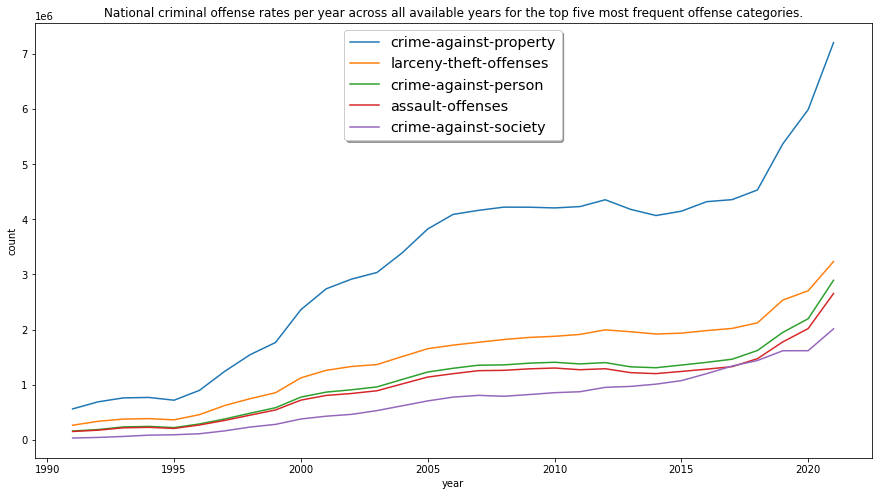

In [ ]:
fig, ax = plt.subplots(figsize=[15, 8])
for i in range(len(top_5)):
  ax.plot(fbi_5_dfs[i]["year"], fbi_5_dfs[i]["count"], label=top_5[i])

ax.set_xlabel("year")
ax.set_ylabel("count")
ax.set_title("National criminal offense rates per year across all available years for the top five most frequent offense categories.")
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

###2. The average percentage of violent crimes relative to total crime per state over all available years.

In [ ]:
fbi_df.head()

,state,offense,year,count
0,HI,aggravated-assault,2018,1364
1,HI,aggravated-assault,2019,1413
2,HI,aggravated-assault,2020,1364
3,HI,aggravated-assault,2021,1505
4,HI,all-other-larceny,2018,8680


A list of violent crimes [Source](https://study.com/learn/lesson/violent-crimes-list-types-examples.html)

In [ ]:
violent_off = [
    'kidnapping-abduction',
    'arson',
    'aggravated-assault',
    'murder-and-nonnegligent-manslaughter',
    'rape',
    'robbery',
    'sexual-assult-with-an-object',
    'negligent-manslaughter',
    'assault-offenses',
    'homicide-offenses',
    'human-trafficking-offenses',
    'sex-offenses',
    'crime-against-person',
    ]
all_offenses = 'all-offenses'

Sum Crimes for all years for the same state

In [ ]:
cp_fbi = fbi_df.copy()
cp_fbi = cp_fbi.groupby(["state", "offense"], as_index=False).sum("count")
print(cp_fbi.count())
cp_fbi.head()

state      3252
offense    3252
year       3252
count      3252
dtype: int64


,state,offense,year,count
0,AK,aggravated-assault,2021,1285
1,AK,all-offenses,92966,16328
2,AK,all-other-larceny,2021,1043
3,AK,animal-cruelty,2021,22
4,AK,arson,2021,66


all offenses

In [ ]:
all_off_df = cp_fbi.loc[cp_fbi["offense"] == all_offenses]
print(all_off_df.count())
all_off_df.head()

state      51
offense    51
year       51
count      51
dtype: int64


,state,offense,year,count
1,AK,all-offenses,92966,16328
60,AL,all-offenses,1242726,1012991
123,AR,all-offenses,1980848,4454037
189,AZ,all-offenses,1427284,599315
253,CA,all-offenses,92966,154658


sum of violent offenses

In [ ]:
cp_fbi = cp_fbi.loc[cp_fbi["offense"].isin(violent_off)].groupby("state", as_index=False).sum("count")
print(cp_fbi.count())
cp_fbi.head()

state    51
year     51
count    51
dtype: int64


,state,year,count
0,AK,66693,14523
1,AL,802346,545342
2,AR,1345502,2312171
3,AZ,980410,237239
4,CA,60630,79562


In [ ]:
df1 = all_off_df.copy()
df1 = df1.rename(columns={"count": "all_count"})
df1.pop("year")
df1.pop("offense")
df1.head()

,state,all_count
1,AK,16328
60,AL,1012991
123,AR,4454037
189,AZ,599315
253,CA,154658


In [ ]:
df2 = cp_fbi.copy()
df2.head()
df2.pop("year")
df2 = df2.merge(df1, left_on="state", right_on="state")
df2.head()

,state,count,all_count
0,AK,14523,16328
1,AL,545342,1012991
2,AR,2312171,4454037
3,AZ,237239,599315
4,CA,79562,154658


In [ ]:
df2["percent"] = (df2["count"]/df2["all_count"])*100


In [ ]:
df2.head()

,state,count,all_count,percent
0,AK,14523,16328,88.945370
1,AL,545342,1012991,53.834832
2,AR,2312171,4454037,51.911805
3,AZ,237239,599315,39.585026
4,CA,79562,154658,51.443831


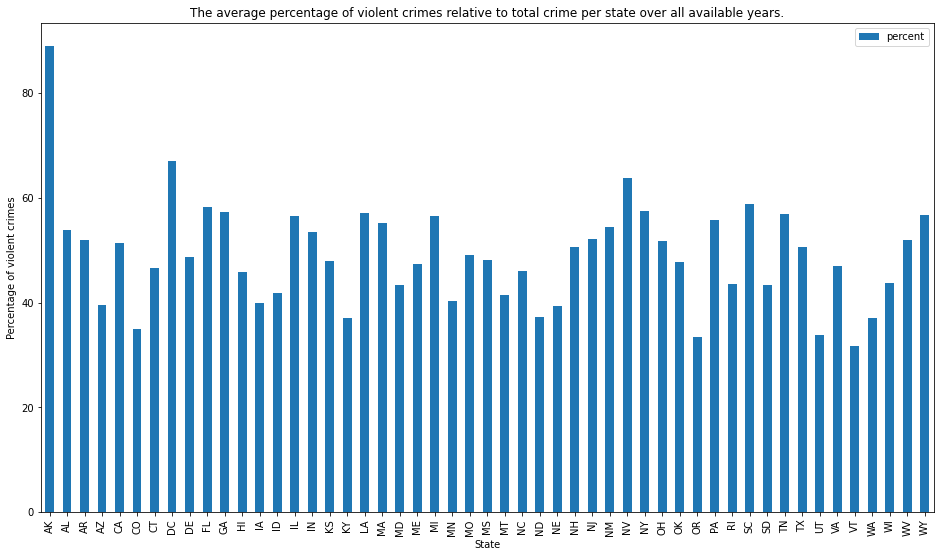

In [ ]:
df2.plot(kind='bar', x="state", y="percent", xlabel="State", figsize=(16, 9), ylabel="Percentage of violent crimes",title="The average percentage of violent crimes relative to total crime per state over all available years.")

###3. National homicide rates, as well as total violent crime rates per year over all years.

A list of violent crimes [Source](https://study.com/learn/lesson/violent-crimes-list-types-examples.html)

In [ ]:
violent_off = [
    'kidnapping-abduction',
    'arson',
    'aggravated-assault',
    'murder-and-nonnegligent-manslaughter',
    'rape',
    'robbery',
    'sexual-assult-with-an-object',
    'negligent-manslaughter',
    'assault-offenses',
    'homicide-offenses',
    'human-trafficking-offenses',
    'sex-offenses',
    'crime-against-person',
    ]
all_offenses = 'all-offenses'
homicide = 'homicide-offenses'

####National homcide rate per year

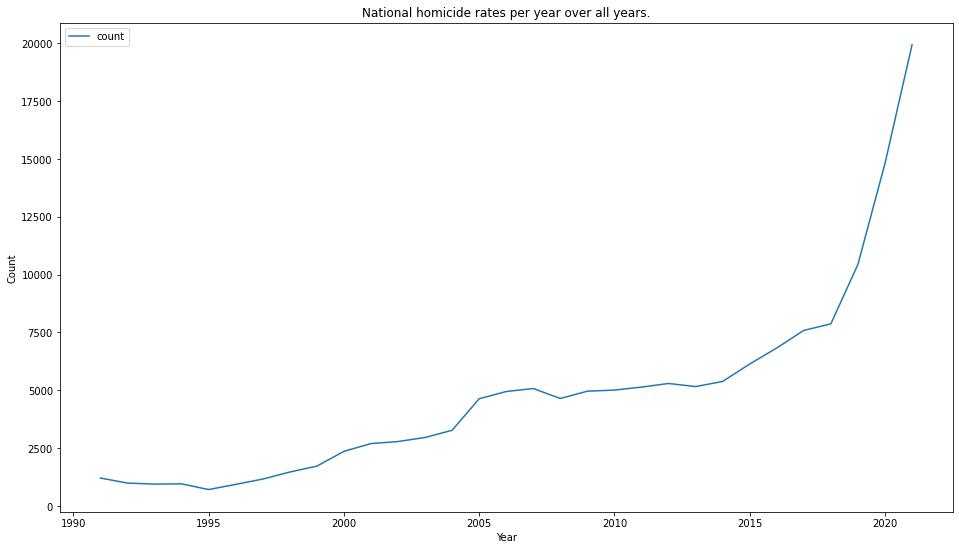

In [ ]:
hom_df = fbi_df.copy()
hom_df = hom_df.loc[hom_df["offense"] == homicide]
hom_df = hom_df.groupby("year", as_index=False).sum("count")
hom_df.plot(x="year", y="count", xlabel="Year", ylabel="Count", figsize=(16,9), title="National homicide rates per year over all years.")

####Total violent crime rates per year over all years

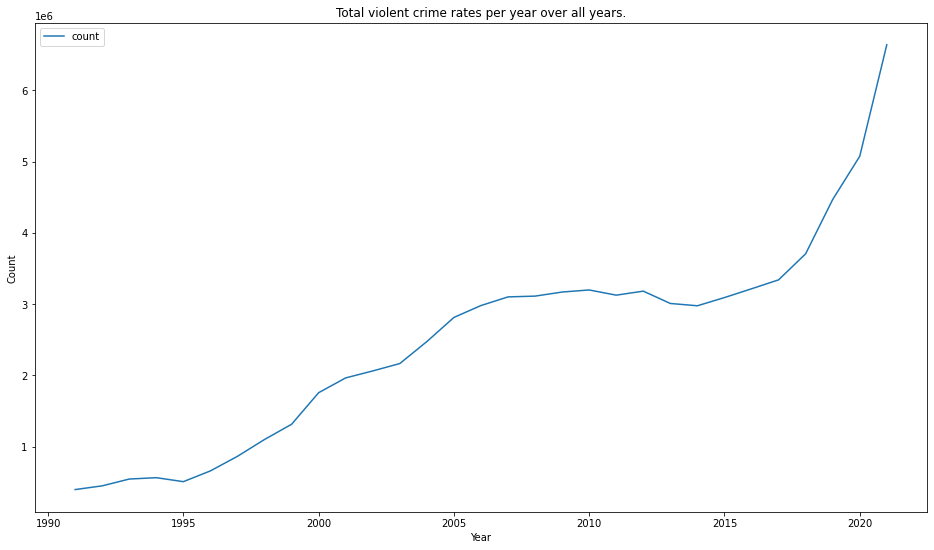

In [ ]:
tot_vio_df = fbi_df.copy()
tot_vio_df = tot_vio_df.loc[tot_vio_df["offense"].isin(violent_off)]
tot_vio_df = tot_vio_df.groupby("year", as_index=False).sum("count")
tot_vio_df.plot(x="year", y="count", xlabel="Year", ylabel="Count", figsize=(16,9), title="Total violent crime rates per year over all years.")

###4 The frequency of non-fatal crime incidents in relation to victim demographics

In [ ]:
frequenc_sex=victim_df['sex'].value_counts()
frequenc_age=victim_df['ager'].value_counts()
frequenc_race=victim_df['race_ethnicity'].value_counts()
total_count=victim_df.shape[0]

#### Single plots



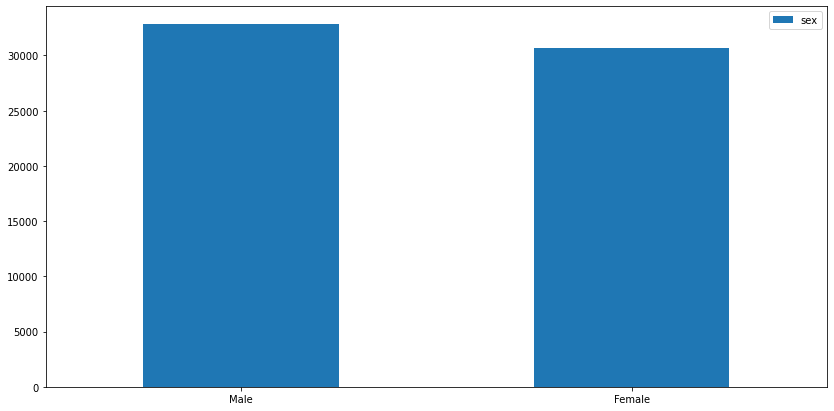

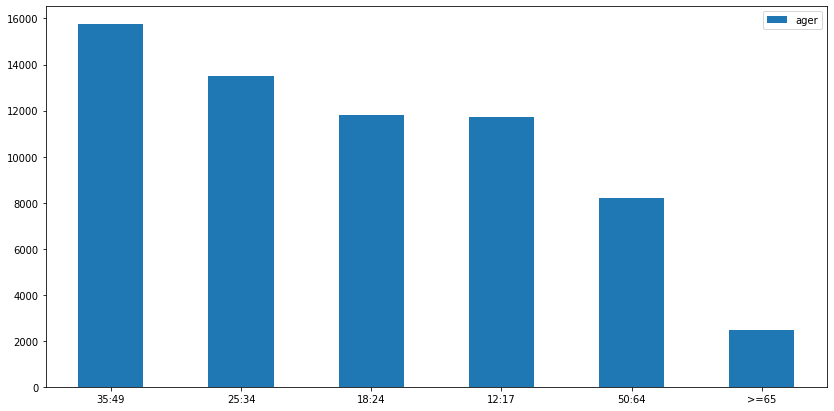

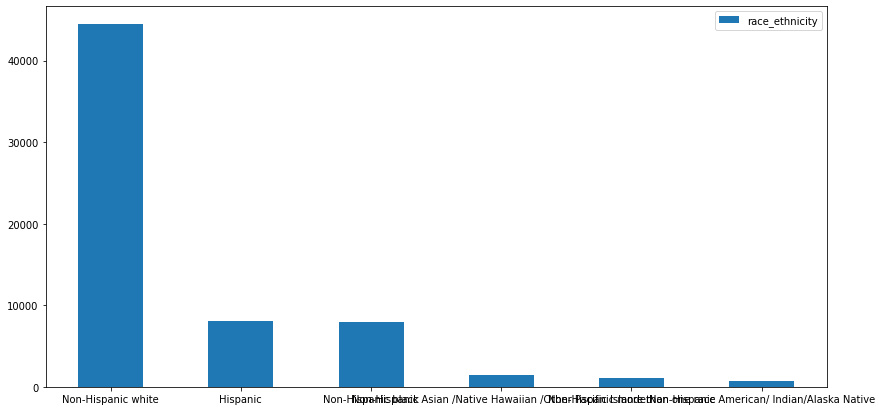

In [ ]:
pd.DataFrame(frequenc_sex).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(frequenc_age).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(frequenc_race).plot.bar(rot=0, figsize=(14,7))

#### Heatmap







In [ ]:
# victim_df[["sex", "ager", "race_ethnicity"]]
cp_vic_df = victim_df.copy()
cp_vic_df = cp_vic_df[["sex", "ager", "race_ethnicity"]]
cp_vic_df["count"] = 1

##### Sex & Race

In [ ]:
sr_vic = cp_vic_df.groupby(["sex", "race_ethnicity"], as_index=False).sum("count")
sr_vic["count"] = sr_vic["count"]
sr_vic.head()

,sex,race_ethnicity,count
0,Female,Hispanic,3727
1,Female,Non-Hispanic American/ Indian/Alaska Native,348
2,Female,Non-Hispanic Asian /Native Hawaiian /Other Pac...,619
3,Female,Non-Hispanic black,4325
4,Female,Non-Hispanic more than one race,580


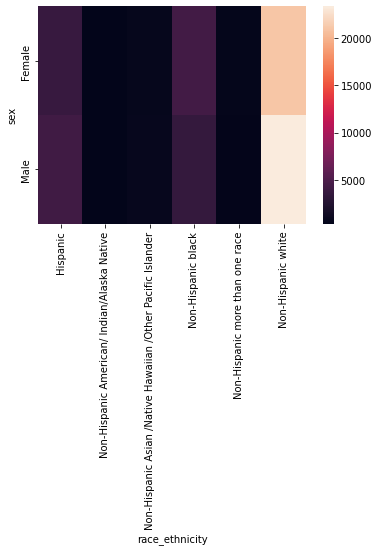

In [ ]:
piv = pd.pivot_table(sr_vic, values="count",index=["sex"], columns=["race_ethnicity"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

##### Sex & Age

In [ ]:
sr_vic = cp_vic_df.groupby(["sex", "ager"], as_index=False).sum("count")
sr_vic["count"] = sr_vic["count"]
sr_vic.head()

,sex,ager,count
0,Female,12:17,4567
1,Female,18:24,5698
2,Female,25:34,6918
3,Female,35:49,8141
4,Female,50:64,4059


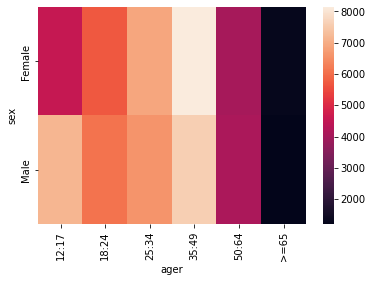

In [ ]:
piv = pd.pivot_table(sr_vic, values="count",index=["sex"], columns=["ager"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

##### Age & Race

In [ ]:
sr_vic = cp_vic_df.groupby(["ager", "race_ethnicity"], as_index=False).sum("count")
sr_vic["count"] = sr_vic["count"]
sr_vic.head()

,ager,race_ethnicity,count
0,12:17,Hispanic,1797
1,12:17,Non-Hispanic American/ Indian/Alaska Native,106
2,12:17,Non-Hispanic Asian /Native Hawaiian /Other Pac...,188
3,12:17,Non-Hispanic black,1588
4,12:17,Non-Hispanic more than one race,217


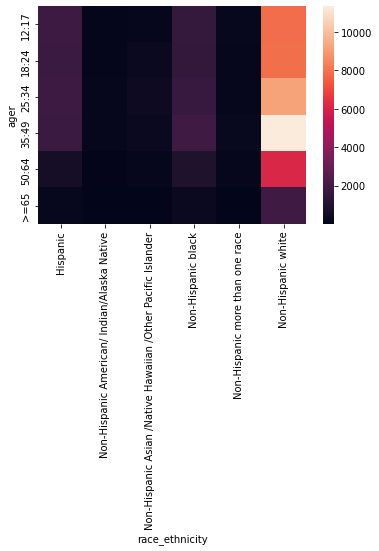

In [ ]:
piv = pd.pivot_table(sr_vic, values="count",index=["ager"], columns=["race_ethnicity"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

### 5 The frequency of non-fatal crime incidents in relation to offender demographics.

In [ ]:
frequenc_sex=victim_df['offendersex'].value_counts()
frequenc_age=victim_df['offenderage'].value_counts()
frequenc_race=victim_df['offtracenew'].value_counts()
total_count=victim_df.shape[0]

#### Single plots



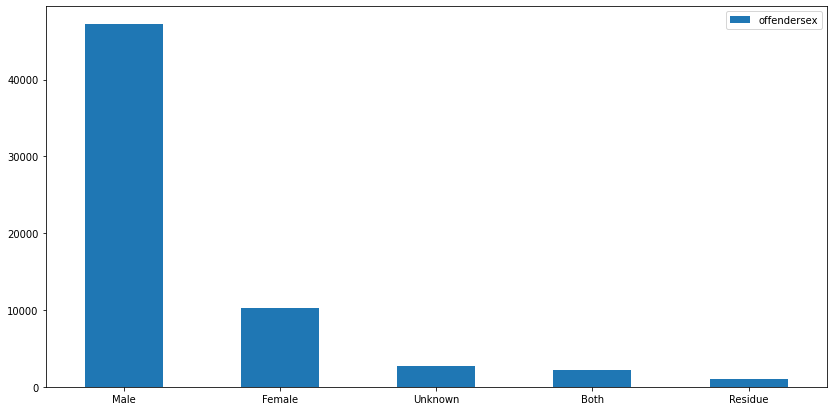

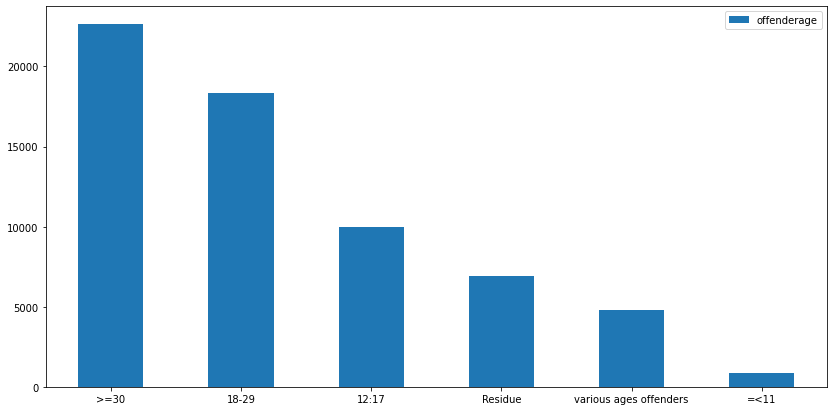

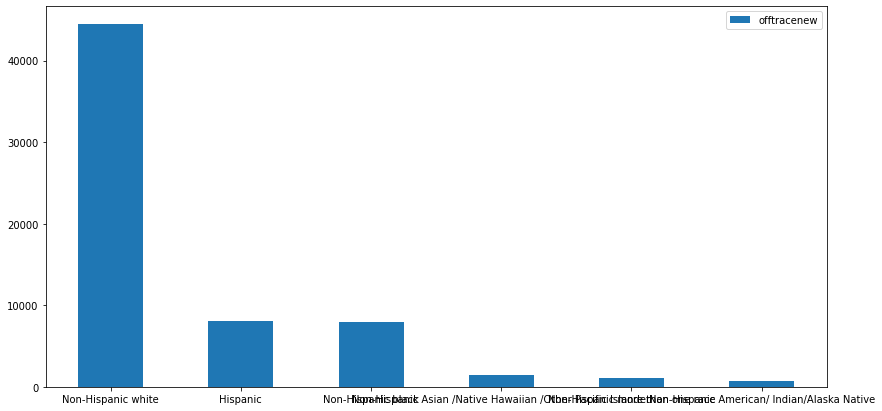

In [ ]:
pd.DataFrame(frequenc_sex).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(frequenc_age).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(frequenc_race).plot.bar(rot=0, figsize=(14,7))

#### Heatmap







In [ ]:
cp_vic_df = victim_df.copy()
cp_vic_df = cp_vic_df[["offendersex", "offenderage", "offtracenew"]]
cp_vic_df["count"] = 1
cp_vic_df.head()

,offendersex,offenderage,offtracenew,count
0,Male,18-29,Non-Hispanic black,1
1,Male,various ages offenders,Non-Hispanic white,1
2,Male,>=30,Non-Hispanic white,1
3,Male,Residue,Hispanic,1
4,Both,18-29,Non-Hispanic white,1


##### Sex & Race

In [ ]:
sr_vic = cp_vic_df.groupby(["offendersex", "offtracenew"], as_index=False).sum("count")
sr_vic["count"] = sr_vic["count"]
sr_vic.head()

,offendersex,offtracenew,count
0,Both,Hispanic,324
1,Both,Non-Hispanic American/ Indian/Alaska Native,40
2,Both,Non-Hispanic Asian /Native Hawaiian /Other Pac...,46
3,Both,Non-Hispanic black,305
4,Both,Non-Hispanic more than one race,26


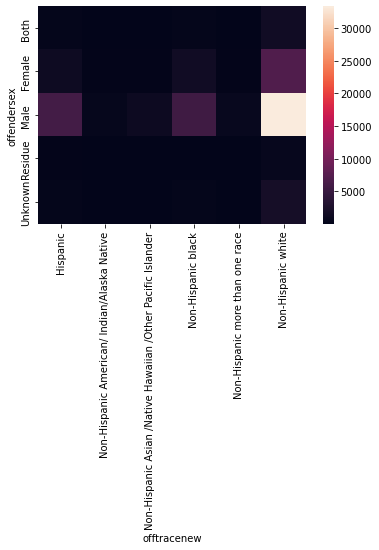

In [ ]:
piv = pd.pivot_table(sr_vic, values="count",index=["offendersex"], columns=["offtracenew"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

##### Sex & Age

In [ ]:
sr_vic = cp_vic_df.groupby(["offendersex", "offenderage"], as_index=False).sum("count")
sr_vic["count"] = sr_vic["count"]
sr_vic.head()

,offendersex,offenderage,count
0,Both,12:17,143
1,Both,18-29,326
2,Both,=<11,18
3,Both,>=30,515
4,Both,Residue,181


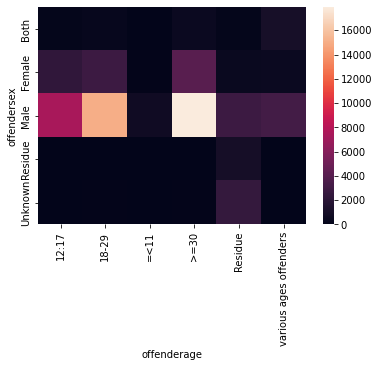

In [ ]:
piv = pd.pivot_table(sr_vic, values="count",index=["offendersex"], columns=["offenderage"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

##### Age & Race

In [ ]:
sr_vic = cp_vic_df.groupby(["offenderage", "offtracenew"], as_index=False).sum("count")
sr_vic["count"] = sr_vic["count"]
sr_vic.head()

,offenderage,offtracenew,count
0,12:17,Hispanic,1331
1,12:17,Non-Hispanic American/ Indian/Alaska Native,90
2,12:17,Non-Hispanic Asian /Native Hawaiian /Other Pac...,162
3,12:17,Non-Hispanic black,1185
4,12:17,Non-Hispanic more than one race,173


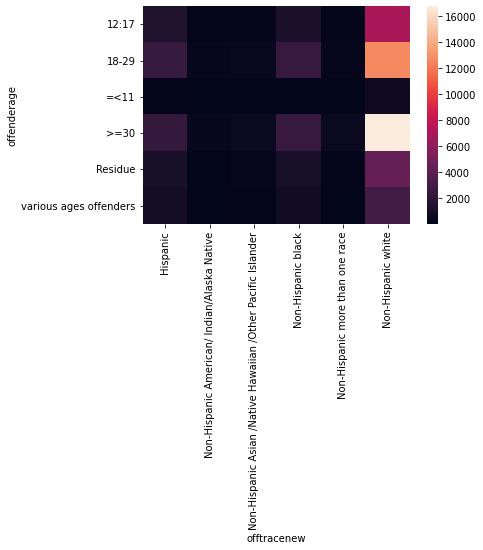

In [ ]:
piv = pd.pivot_table(sr_vic, values="count",index=["offenderage"], columns=["offtracenew"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

### 6 The relationship between the victim’s education level, their gross household income, and their rate of victimization.

In [ ]:
freq_edu=victim_df['educatn1'].value_counts()
freq_income=victim_df['hincome1'].value_counts()
total_count=victim_df.shape[0]

#### Single plots



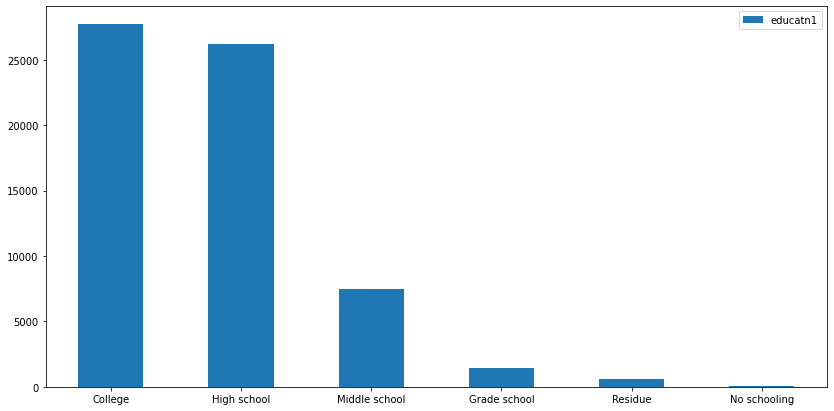

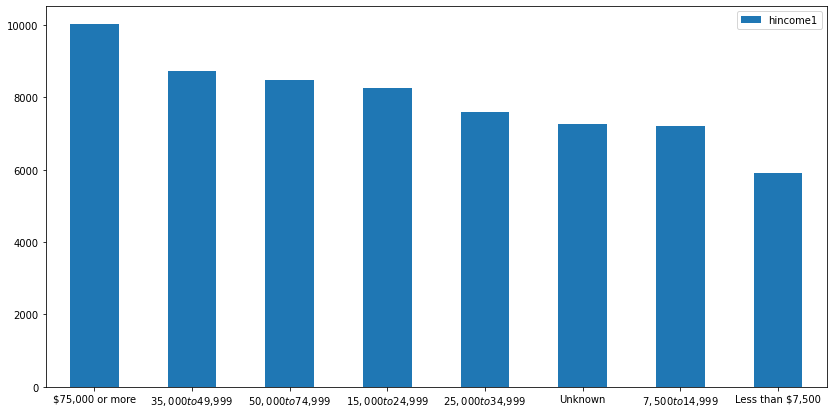

In [ ]:
pd.DataFrame(freq_edu).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(freq_income).plot.bar(rot=0, figsize=(14,7))

#### Heatmap







In [ ]:
cp_vic_df = victim_df.copy()
cp_vic_df = cp_vic_df[["educatn1", "hincome1"]]
cp_vic_df["count"] = 1
cp_vic_df.head() 

,educatn1,hincome1,count
0,High school,"Less than $7,500",1
1,High school,"$75,000 or more",1
2,High school,"$35,000 to $49,999",1
3,High school,"$35,000 to $49,999",1
4,College,"$50,000 to $74,999",1


In [ ]:
sr_vic = cp_vic_df.groupby(["educatn1", "hincome1"], as_index=False).sum("count")
sr_vic["count"] = sr_vic["count"]
sr_vic.head()

,educatn1,hincome1,count
0,College,"$15,000 to $24,999",2892
1,College,"$25,000 to $34,999",3002
2,College,"$35,000 to $49,999",4038
3,College,"$50,000 to $74,999",4411
4,College,"$7,500 to $14,999",2293


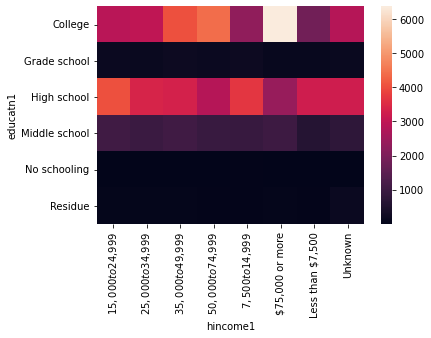

In [ ]:
piv = pd.pivot_table(sr_vic, values="count",index=["educatn1"], columns=["hincome1"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

# PART 3: Answering Questions 
## Detailed commentary are available in the business report

## 1. Which type of non-fatal crime is the most under-reported? Is there an association between the offender-victim relationship and the likelihood of a crime being reported?

notify	===>>>Specifies whether the crime was reported to police

newoff	+=====>>> Type of crime

direl	=====>>>>> Classification of respondent relationship to the offender for crimes involving direct contact

In [ ]:
cp_vic = victim_df.copy()
cp_vic = cp_vic[["notify", "newoff", "direl"]]
cp_vic["count"] = 1
cp_vic.head()

,notify,newoff,direl,count
0,1,Simple assault,Intimates,1
1,1,Roberry,Strangers,1
2,2,Simple assault,Well known/casual acquaintance,1
3,1,Simple assault,Do not know relationship,1
4,2,Simple assault,Strangers,1


#### Most under-reported

In [ ]:
unreported_crime = cp_vic.loc[cp_vic["notify"] != 1]
unreported_crime = unreported_crime.groupby("newoff", as_index=False).sum("count")
unreported_crime.pop("notify")
unreported_crime.head()

,newoff,count
0,Aggravated assault,5056
1,Personal theft/larceny,1256
2,Rape/sexual assault,2146
3,Roberry,2725
4,Simple assault,23498


In [ ]:
crimes_df = cp_vic.groupby("newoff", as_index=False).sum("count")
crimes_df.pop("notify")
crimes_df = crimes_df.rename(columns={"count": "crime_count"})
crimes_df.head()

,newoff,crime_count
0,Aggravated assault,12109
1,Personal theft/larceny,2051
2,Rape/sexual assault,3160
3,Roberry,6670
4,Simple assault,39475


In [ ]:
unreported_crime = unreported_crime.merge(crimes_df, on= "newoff")
unreported_crime.head()

,newoff,count,crime_count
0,Aggravated assault,5056,12109
1,Personal theft/larceny,1256,2051
2,Rape/sexual assault,2146,3160
3,Roberry,2725,6670
4,Simple assault,23498,39475


In [ ]:
unreported_crime["rate"] = (unreported_crime["count"]/unreported_crime["crime_count"]) * 100
unreported_crime.head()

,newoff,count,crime_count,rate
0,Aggravated assault,5056,12109,41.754067
1,Personal theft/larceny,1256,2051,61.238420
2,Rape/sexual assault,2146,3160,67.911392
3,Roberry,2725,6670,40.854573
4,Simple assault,23498,39475,59.526282


In [ ]:
unreported_crime = unreported_crime.sort_values("rate", ascending=False)
unreported_crime.pop("count")
unreported_crime.pop("crime_count")
unreported_crime.head()

,newoff,rate
2,Rape/sexual assault,67.911392
1,Personal theft/larceny,61.238420
4,Simple assault,59.526282
0,Aggravated assault,41.754067
3,Roberry,40.854573


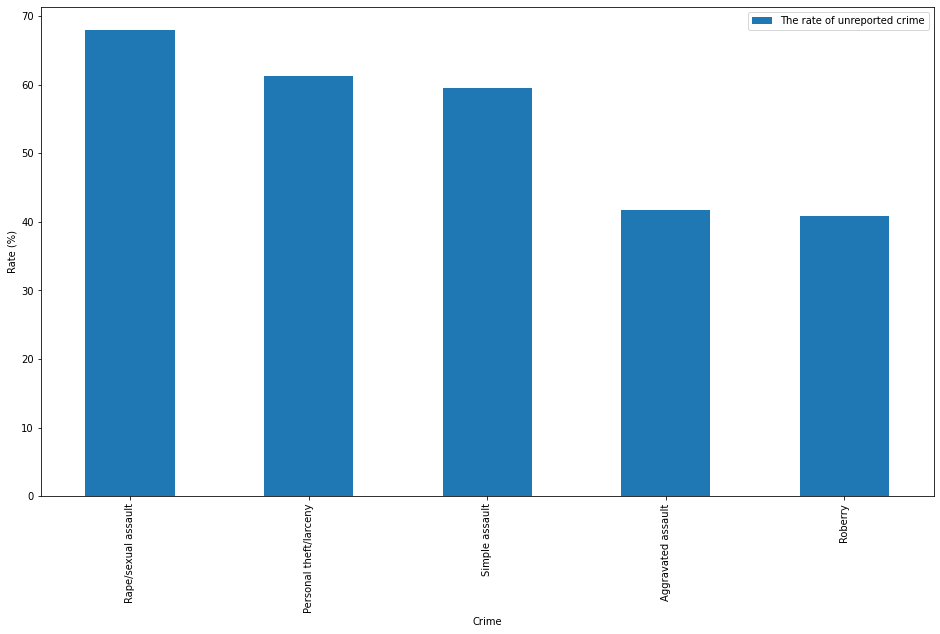

In [ ]:
unreported_crime.plot(kind="bar", x="newoff", y="rate", xlabel="Crime", ylabel="Rate (%)", label="The rate of unreported crime", figsize=(16,9))

**The crime that goes most unreported is Rape/sexual assult**

---



#### Association between the offender-victim relationship and the likelihood of a crime being reported

In [ ]:
cp_vic.count()

notify    63465
newoff    63465
direl     63465
count     63465
dtype: int64

In [ ]:
crimes_rel_df = cp_vic.groupby(["newoff", "direl"], as_index=False).sum("count")
crimes_rel_df.pop("notify")
crimes_rel_df = crimes_rel_df.rename(columns={"count": "crime_count"})
crimes_rel_df.head()

,newoff,direl,crime_count
0,Aggravated assault,Do not know number of offenders,362
1,Aggravated assault,Do not know relationship,514
2,Aggravated assault,Intimates,1255
3,Aggravated assault,Other relatives,712
4,Aggravated assault,Strangers,5853


In [ ]:
unreported_crime = cp_vic.loc[cp_vic["notify"] != 1]
unreported_crime = unreported_crime.groupby(["newoff", "direl"], as_index=False).sum("count")
unreported_crime.pop("notify")
unreported_crime.head()

,newoff,direl,count
0,Aggravated assault,Do not know number of offenders,157
1,Aggravated assault,Do not know relationship,197
2,Aggravated assault,Intimates,435
3,Aggravated assault,Other relatives,254
4,Aggravated assault,Strangers,2423


In [ ]:
unreported_crime = unreported_crime.merge(crimes_rel_df, on= ["newoff", "direl"])
unreported_crime.head()

,newoff,direl,count,crime_count
0,Aggravated assault,Do not know number of offenders,157,362
1,Aggravated assault,Do not know relationship,197,514
2,Aggravated assault,Intimates,435,1255
3,Aggravated assault,Other relatives,254,712
4,Aggravated assault,Strangers,2423,5853


In [ ]:
unreported_crime["rate"] = (unreported_crime["count"]/unreported_crime["crime_count"]) * 100
unreported_crime.head()

,newoff,direl,count,crime_count,rate
0,Aggravated assault,Do not know number of offenders,157,362,43.370166
1,Aggravated assault,Do not know relationship,197,514,38.326848
2,Aggravated assault,Intimates,435,1255,34.661355
3,Aggravated assault,Other relatives,254,712,35.674157
4,Aggravated assault,Strangers,2423,5853,41.397574


In [ ]:
unreported_crime = unreported_crime.sort_values("rate", ascending=False)
unreported_crime.pop("count")
unreported_crime.pop("crime_count")
unreported_crime.head()

,newoff,direl,rate
9,Personal theft/larceny,Other relatives,80.952381
11,Personal theft/larceny,Well known/casual acquaintance,75.294118
14,Rape/sexual assault,Intimates,72.610556
17,Rape/sexual assault,Well known/casual acquaintance,70.527157
12,Rape/sexual assault,Do not know number of offenders,69.565217


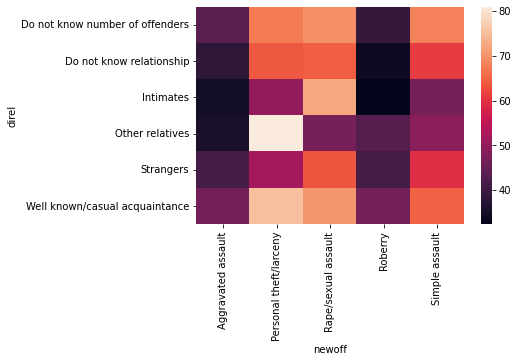

In [ ]:
piv = pd.pivot_table(unreported_crime, values="rate",index=["direl"], columns=["newoff"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

##2. Who are the people (the demographic segment) that appear to be most at risk of violent victimization? Who is the least at risk?

newcrime	=====>>> Aggregate type of crime; violent crime includes all rape, sexual assault, robbery, assault

sex => Respondent sex

ager

race_ethnicity

In [ ]:
violent_df = victim_df.copy()
violent_df = violent_df[["newcrime", "sex", "ager", "race_ethnicity"]]
violent_df["count"] = 1
violent_df = violent_df.loc[victim_df["newcrime"] == 1]

violent_df.head()

,newcrime,sex,ager,race_ethnicity,count
0,1,Female,18:24,Non-Hispanic black,1
1,1,Male,12:17,Non-Hispanic white,1
2,1,Male,35:49,Non-Hispanic white,1
3,1,Male,25:34,Hispanic,1
4,1,Male,18:24,Non-Hispanic white,1


### Single plots

In [ ]:
sex = violent_df.sex.value_counts()
age = violent_df.ager.value_counts()
race = violent_df.race_ethnicity.value_counts()
sex

Male      31959
Female    29455
Name: sex, dtype: int64

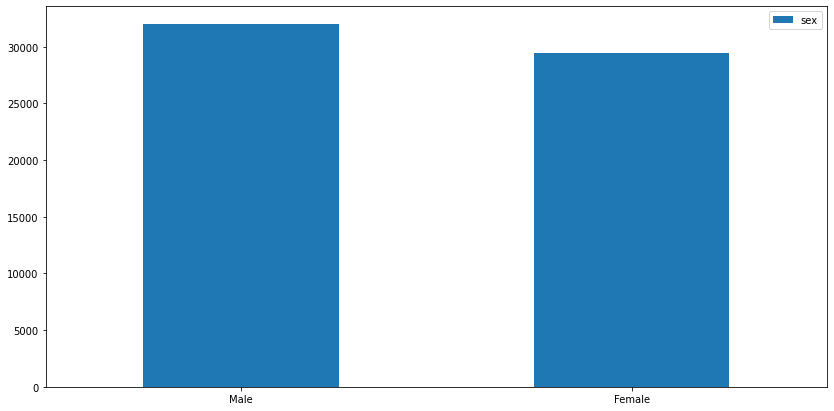

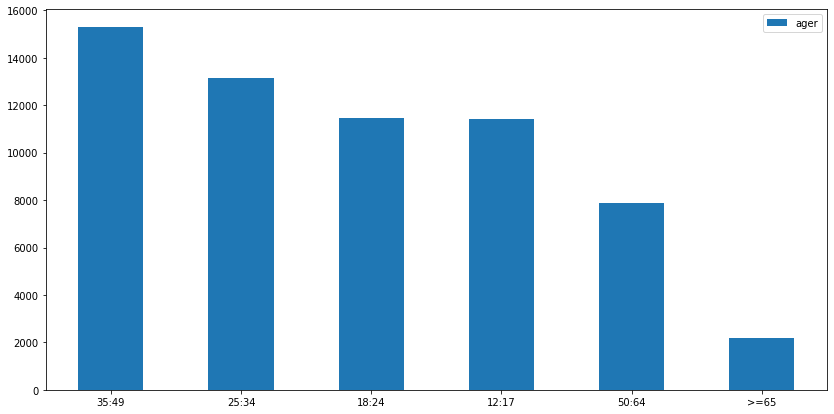

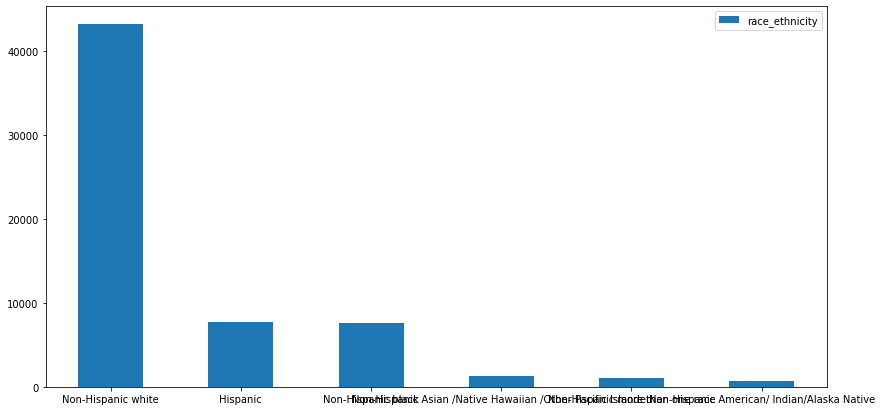

In [ ]:
pd.DataFrame(sex).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(age).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(race).plot.bar(rot=0, figsize=(14,7))

### Heatmap

#### Sex & Age

In [ ]:
sav_df = violent_df.groupby(["sex", "ager"], as_index=False).sum("count")
sav_df.head()

,sex,ager,newcrime,count
0,Female,12:17,4468,4468
1,Female,18:24,5547,5547
2,Female,25:34,6688,6688
3,Female,35:49,7828,7828
4,Female,50:64,3849,3849


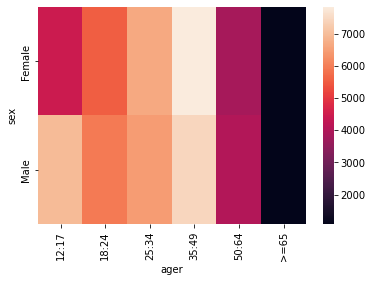

In [ ]:
piv = pd.pivot_table(sav_df, values="count",index=["sex"], columns=["ager"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

#### Sex & Race

In [ ]:
sav_df = violent_df.groupby(["sex", "race_ethnicity"], as_index=False).sum("count")
sav_df.head()

,sex,race_ethnicity,newcrime,count
0,Female,Hispanic,3534,3534
1,Female,Non-Hispanic American/ Indian/Alaska Native,343,343
2,Female,Non-Hispanic Asian /Native Hawaiian /Other Pac...,560,560
3,Female,Non-Hispanic black,4130,4130
4,Female,Non-Hispanic more than one race,565,565


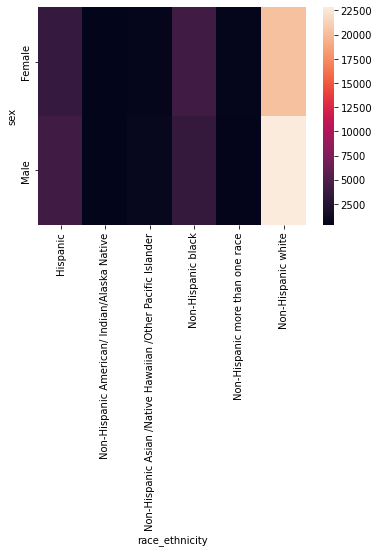

In [ ]:
piv = pd.pivot_table(sav_df, values="count",index=["sex"], columns=["race_ethnicity"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

#### Age & Race

In [ ]:
sav_df = violent_df.groupby(["ager", "race_ethnicity"], as_index=False).sum("count")
sav_df.head()

,ager,race_ethnicity,newcrime,count
0,12:17,Hispanic,1751,1751
1,12:17,Non-Hispanic American/ Indian/Alaska Native,105,105
2,12:17,Non-Hispanic Asian /Native Hawaiian /Other Pac...,177,177
3,12:17,Non-Hispanic black,1544,1544
4,12:17,Non-Hispanic more than one race,212,212


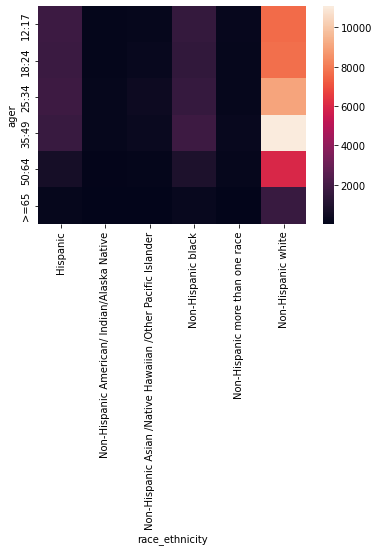

In [ ]:
piv = pd.pivot_table(sav_df, values="count",index=["ager"], columns=["race_ethnicity"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

### All correlation (require a 4d graph)

In [ ]:
sav_df = violent_df.groupby(["sex", "ager", "race_ethnicity"], as_index=False).sum("count")
sav_df.pop("newcrime")
sav_df = sav_df.sort_values(by="count", ascending=False)
sav_df.head()

,sex,ager,race_ethnicity,count
23,Female,35:49,Non-Hispanic white,5580
59,Male,35:49,Non-Hispanic white,5485
41,Male,12:17,Non-Hispanic white,4710
53,Male,25:34,Non-Hispanic white,4635
17,Female,25:34,Non-Hispanic white,4421


##3. Of all victims of non-fatal crimes who suffer an injury, which demographic is the most likely to receive medical attention at the scene? Which is the least likely?

injury	=> Specifies whether bodily hurt or damage was sustained by a victim as the result of criminal victimization

treatment => Specifies whether respondent received medical treatment for injuries from crime

"sex", "ager", "race_ethnicity"

In [ ]:
df = victim_df.copy()
df = df[["injury", "treatment", "sex", "ager", "race_ethnicity"]]
df["count"] = 1
df = df.copy()
df.head()

,injury,treatment,sex,ager,race_ethnicity,count
0,0,0,Female,18:24,Non-Hispanic black,1
1,0,0,Male,12:17,Non-Hispanic white,1
2,0,0,Male,35:49,Non-Hispanic white,1
3,0,0,Male,25:34,Hispanic,1
4,1,1,Male,18:24,Non-Hispanic white,1


all

In [ ]:
all_df = df.groupby(["sex", "ager", "race_ethnicity"], as_index=False).sum("count")
all_df.pop("injury")
all_df.pop("treatment")
all_df = all_df.rename(columns={"count": "all_count"})
all_df.head()

,sex,ager,race_ethnicity,all_count
0,Female,12:17,Hispanic,652
1,Female,12:17,Non-Hispanic American/ Indian/Alaska Native,43
2,Female,12:17,Non-Hispanic Asian /Native Hawaiian /Other Pac...,68
3,Female,12:17,Non-Hispanic black,710
4,Female,12:17,Non-Hispanic more than one race,106


injured + treated

In [ ]:
jt_df = df.loc[df["injury"] == 1].loc[df['treatment'] == 2]
jt_df = jt_df.groupby(["sex", "ager", "race_ethnicity"], as_index=False).sum("count")
jt_df.pop("injury")
jt_df.pop("treatment")
jt_df.head()

,sex,ager,race_ethnicity,count
0,Female,12:17,Hispanic,80
1,Female,12:17,Non-Hispanic American/ Indian/Alaska Native,5
2,Female,12:17,Non-Hispanic Asian /Native Hawaiian /Other Pac...,8
3,Female,12:17,Non-Hispanic black,95
4,Female,12:17,Non-Hispanic more than one race,11


### All demographic no graph (4D graph)**bold text**

In [ ]:
jt_df = jt_df.merge(all_df, on=["sex", "ager", "race_ethnicity"])
jt_df["rate"] = (jt_df["count"]/jt_df["all_count"]) * 100
jt_df =jt_df.sort_values("rate", ascending=False)
jt_df.pop("count")
jt_df.pop("all_count")
jt_df.head()

,sex,ager,race_ethnicity,rate
67,Male,>=65,Non-Hispanic American/ Indian/Alaska Native,33.333333
31,Female,>=65,Non-Hispanic American/ Indian/Alaska Native,25.000000
13,Female,25:34,Non-Hispanic American/ Indian/Alaska Native,22.500000
7,Female,18:24,Non-Hispanic American/ Indian/Alaska Native,21.333333
49,Male,25:34,Non-Hispanic American/ Indian/Alaska Native,21.176471


### Single plots

In [ ]:
s_jt_df = df.loc[df["injury"] == 1].loc[df['treatment'] == 2]

In [ ]:
sex = s_jt_df.sex.value_counts()
age = s_jt_df.ager.value_counts()
race = s_jt_df.race_ethnicity.value_counts()
sex

Female    3503
Male      3239
Name: sex, dtype: int64

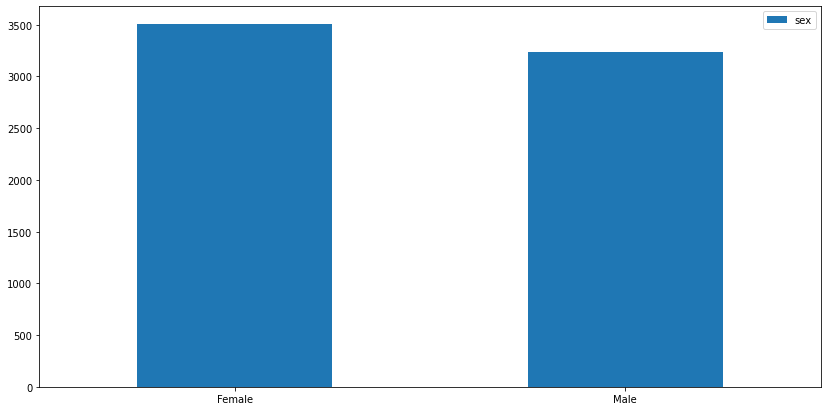

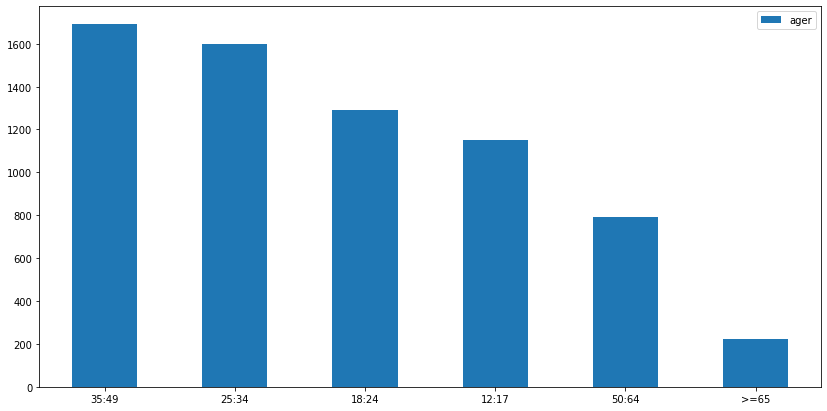

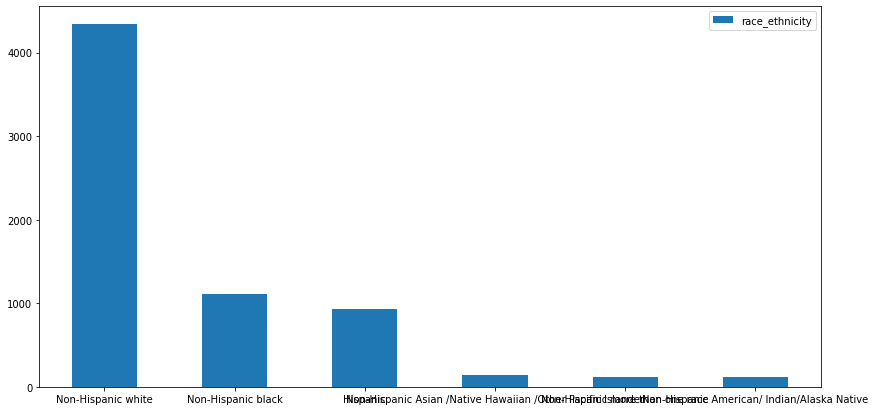

In [ ]:
pd.DataFrame(sex).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(age).plot.bar(rot=0, figsize=(14,7))
pd.DataFrame(race).plot.bar(rot=0, figsize=(14,7))

### Heatmap

#### Sex & Age

In [ ]:
sav_df = jt_df.groupby(["sex", "ager"], as_index=False).sum("count")
sav_df.head()

,sex,ager,rate
0,Female,12:17,68.355935
1,Female,18:24,78.321452
2,Female,25:34,86.036858
3,Female,35:49,82.714530
4,Female,50:64,62.847337


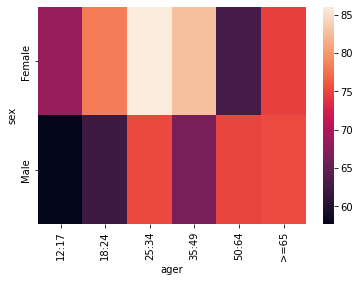

In [ ]:
piv = pd.pivot_table(sav_df, values="rate",index=["sex"], columns=["ager"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

#### Sex & Race

In [ ]:
sav_df = jt_df.groupby(["sex", "race_ethnicity"], as_index=False).sum("count")
sav_df.head()

,sex,race_ethnicity,rate
0,Female,Hispanic,72.818869
1,Female,Non-Hispanic American/ Indian/Alaska Native,107.580294
2,Female,Non-Hispanic Asian /Native Hawaiian /Other Pac...,57.296525
3,Female,Non-Hispanic black,83.626879
4,Female,Non-Hispanic more than one race,71.418756


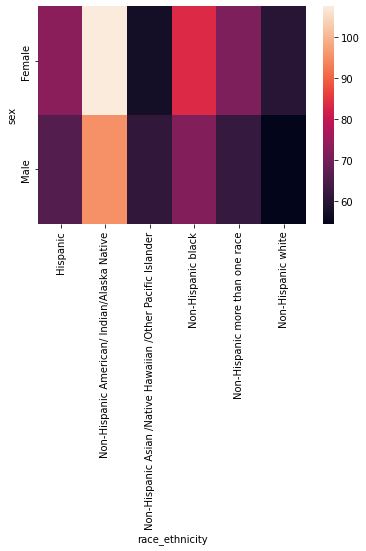

In [ ]:
piv = pd.pivot_table(sav_df, values="rate",index=["sex"], columns=["race_ethnicity"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

#### Age & Race

In [ ]:
sav_df = jt_df.groupby(["ager", "race_ethnicity"], as_index=False).sum("count")
sav_df.head()

,ager,race_ethnicity,rate
0,12:17,Hispanic,22.575616
1,12:17,Non-Hispanic American/ Indian/Alaska Native,19.564415
2,12:17,Non-Hispanic Asian /Native Hawaiian /Other Pac...,22.598039
3,12:17,Non-Hispanic black,24.769803
4,12:17,Non-Hispanic more than one race,18.485467


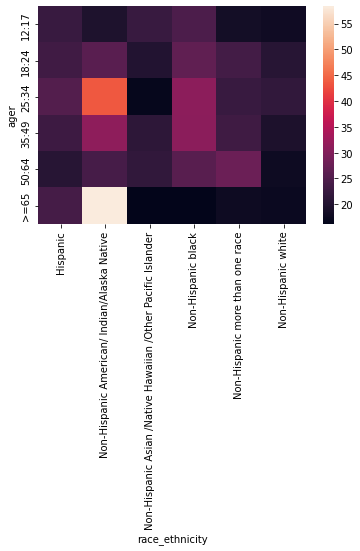

In [ ]:
piv = pd.pivot_table(sav_df, values="rate",index=["ager"], columns=["race_ethnicity"], fill_value=0)
ax = sns.heatmap(piv, square=False)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

## 4. Which class of crimes is associated with the highest rate of same-offense-recidivism; i.e. prison re-entry for the same offense within 3 years of release?

recidivism_within_3years

prison_offense

In [ ]:
cp_df = recid_df.copy()
cp_df = cp_df[["prison_offense", "recidivism_within_3years"]]
cp_df = cp_df.dropna()
cp_df["count"] = 1
cp_df = cp_df.rename(columns={"prison_offense": "offense", "recidivism_within_3years": "recidivism"})
cp_df.head()

,offense,recidivism,count
0,Drug,False,1
1,Violent/Non-Sex,True,1
2,Drug,True,1
3,Property,False,1
4,Violent/Non-Sex,True,1


In [ ]:
all_off = cp_df.groupby("offense", as_index=False).sum("count")
all_off.pop("recidivism")
all_off = all_off.rename(columns={"count": "all_count"})
print(all_off.count())
all_off.head()

offense      5
all_count    5
dtype: int64


,offense,all_count
0,Drug,5190
1,Other,2779
2,Property,8284
3,Violent/Non-Sex,5475
4,Violent/Sex,830


In [ ]:
re_off = cp_df.loc[cp_df["recidivism"] == True]
re_off = re_off.groupby("offense", as_index=False).sum("count")
re_off.pop("recidivism")
re_off.head()

,offense,count
0,Drug,2804
1,Other,1705
2,Property,5323
3,Violent/Non-Sex,2955
4,Violent/Sex,262


In [ ]:
m_off = re_off.merge(all_off, on="offense")
m_off["rate"] = (m_off["count"]/m_off["all_count"])*100
m_off.pop("count")
m_off.pop("all_count")
m_off = m_off.sort_values(by="rate", ascending=False)
m_off.head()

,offense,rate
2,Property,64.256398
1,Other,61.353005
0,Drug,54.026975
3,Violent/Non-Sex,53.972603
4,Violent/Sex,31.566265


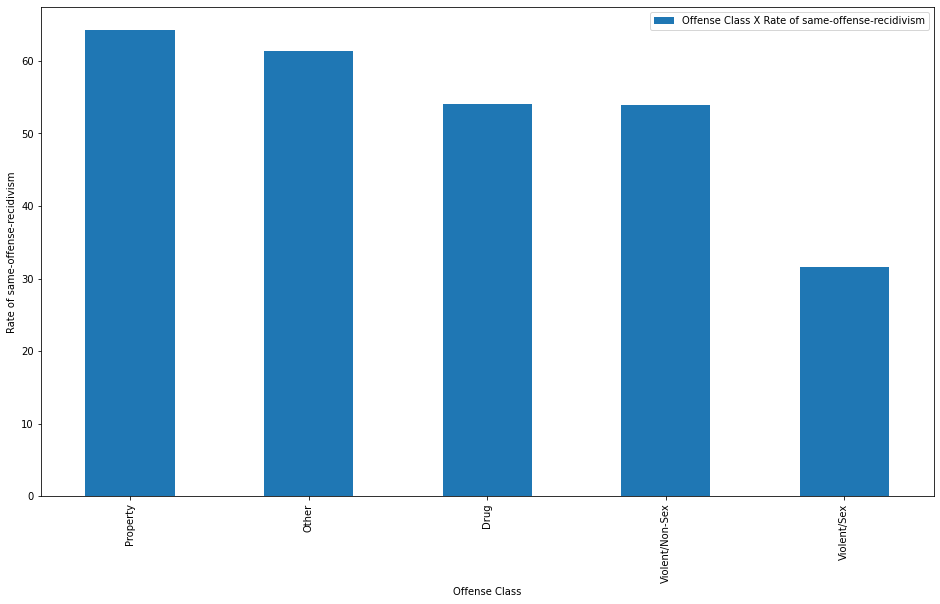

In [ ]:
m_off.plot(kind="bar", x="offense", y="rate", figsize=(16,9), xlabel="Offense Class", ylabel="Rate of same-offense-recidivism", label="Offense Class X Rate of same-offense-recidivism")

## 5 Are prisoners who are younger at the time of release more or less likely to reoffend than those who are older?

age_at_release

recidivism_within_3years

In [ ]:
young_ages = ['18-22', '23-27', '28-32']

In [ ]:
all_ages = recid_df["age_at_release"].unique().tolist()

In [ ]:
old_ages = []
for age in all_ages:
  if age not in young_ages:
    old_ages.append(age)

old_ages

['43-47', '33-37', '48 or older', '38-42']

In [ ]:
cp_df = recid_df.copy()
cp_df = cp_df[["age_at_release", "recidivism_within_3years"]]
cp_df = cp_df.rename(columns={"age_at_release": "age", "recidivism_within_3years": "recidivism"})
cp_df["age"] = cp_df["age"].replace(young_ages, "age <32")
cp_df["age"] = cp_df["age"].replace(old_ages, "age >32")
cp_df["count"] = 1
cp_df.head()

,age,recidivism,count
0,age >32,False,1
1,age >32,True,1
2,age >32,True,1
3,age >32,False,1
4,age >32,True,1


In [ ]:
all_age = cp_df.groupby("age", as_index = False).sum("count")
all_age.pop("recidivism")
all_age = all_age.rename(columns={"count": "all_count"})
all_age.head()

,age,all_count
0,age <32,12224
1,age >32,13611


In [ ]:
re_age = cp_df.loc[cp_df["recidivism"] == True]
re_age.pop("recidivism")
re_age = re_age.groupby("age", as_index=False).sum("count")
re_age.head()

,age,count
0,age <32,7987
1,age >32,6917


In [ ]:
mdf = re_age.merge(all_age, on="age")
mdf["rate"] =(mdf["count"]/mdf["all_count"]) * 100
mdf.pop("count")
mdf.pop("all_count")
mdf.head()

,age,rate
0,age <32,65.338678
1,age >32,50.819190


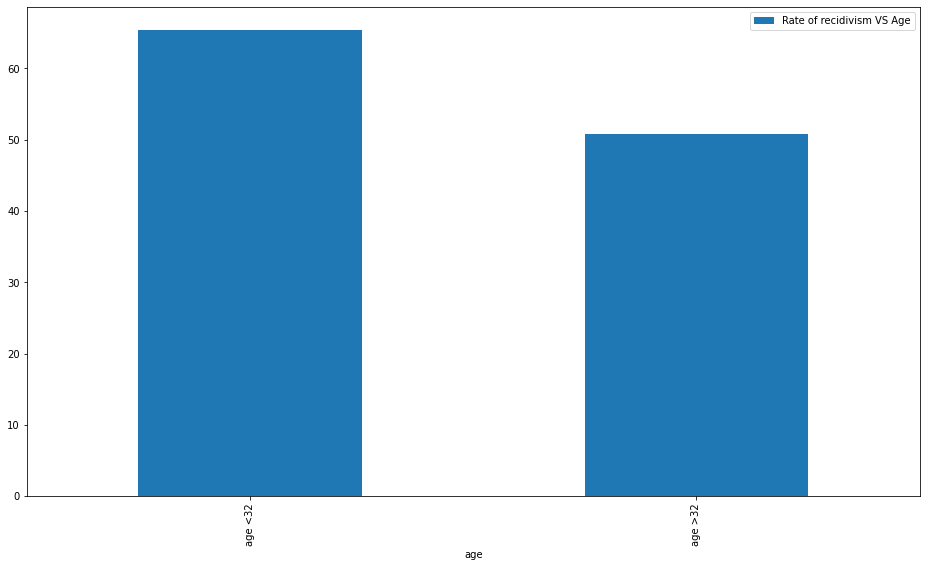

In [ ]:
mdf.plot(kind="bar", x="age", y="rate", figsize=(16,9), label="Rate of recidivism VS Age")

# PART 4: Hypothesis Testing:

## 4.1

*   Hypothsis: Increase in firearms laws lead to a decrease in violent crimes
*   Test used: NUll hyposis test




  



### Data preperation

In [ ]:
violent=['homicide-offenses','assault-offenses','kidnapping-abduction','sexual-assult-with-an-object','robbery']

In [ ]:
viol_fbi = fbi_df.copy()
viol_fbi = viol_fbi.loc[viol_fbi["offense"].isin(violent)]
viol_fbi = viol_fbi.rename(columns={"count": "crime_count"})
viol_fbi = viol_fbi.groupby(["state", "year"], as_index=False).sum("crime_count")
viol_fbi.head()

,state,year,crime_count
0,AK,2021,5598
1,AL,1991,80436
2,AL,1992,68425
3,AL,2006,1044
4,AL,2007,1067


In [ ]:
new_fbi = viol_fbi.merge(states_df, left_on="state", right_on="state_abbr")
new_fbi.pop("state")
new_fbi.pop("state_abbr")
new_fbi = new_fbi.rename(columns={"state_name": "state"})
new_fbi.head()

,year,crime_count,state
0,2021,5598,Alaska
1,1991,80436,Alabama
2,1992,68425,Alabama
3,2006,1044,Alabama
4,2007,1067,Alabama


In [ ]:
states_df.head()

,state_name,state_abbr
0,Hawaii,HI
1,Delaware,DE
2,Puerto Rico,PR
3,Texas,TX
4,Massachusetts,MA


In [ ]:
fire_law = firearm_df.copy()
fire_law = fire_law[["state","year","lawtotal"]]
fire_law = fire_law.groupby(["state","year"], as_index=False).sum("lawtotal")
fire_law.head()

,state,year,lawtotal
0,Alabama,1991,15
1,Alabama,1992,16
2,Alabama,1993,16
3,Alabama,1994,16
4,Alabama,1995,16


In [ ]:
combined_df = fire_law.merge(new_fbi, on=["state", "year"])
joined_df = combined_df.dropna()
avg_crime = joined_df["crime_count"].mean()
joined_df["crime_count"] = np.where(joined_df["crime_count"]>avg_crime,"high","low")
joined_df["lawtotal"] = np.where(joined_df["lawtotal"]>15,"strict","non_strict")
# joined_df["hyposis"] = np(joined_df["lawtotal"]=="strict" or joined_df["lawtotal"]=="non_strict" ).bool(),True,False)
joined_df["hyposis"] = [(l=="strict" and c == "low") or (l=="non_strict" and c == "high") for l, c in zip(joined_df["lawtotal"], joined_df["crime_count"]) ]
joined_df

In [ ]:
combined_df.head()

,state,year,lawtotal,crime_count
0,Alabama,1991,15,80436
1,Alabama,1992,16,68425
2,Alabama,2006,11,1044
3,Alabama,2007,11,1067
4,Alabama,2008,11,1040


In [ ]:
h = joined_df.groupby("hyposis", as_index=False).count()
h

,hyposis,state,year,lawtotal,crime_count
0,False,474,474,474,474
1,True,361,361,361,361


In [ ]:
h_false_count = h.state[0]
h_true_count = h.state[1]
print(f"percentage of the data that disprove the hyposis = {h_false_count/(h_false_count+h_true_count)}%")
print(f"percentage of the data that proves the hyposis = {h_true_count/(h_false_count+h_true_count)}%")


percentage of the data that disprove the hyposis = 0.5676646706586826%
percentage of the data that proves the hyposis = 0.43233532934131735%


In [ ]:
stats.ttest_ind(combined_df["lawtotal"], combined_df["crime_count"]).pvalue

8.96528741958899e-96

In [ ]:
from scipy import stats
all=[]
for state in combined_df['state'].unique():
  Hypothesis={"state":"","p_value":0,"accepted_or_rejected":""}
  al=combined_df[combined_df["state"]==state]
  # print(al.count())
  Hypothesis['state']=state
  test_result=stats.ttest_ind(a=al["lawtotal"], b=al["crime_count"]) 
  Hypothesis['p_value']=test_result[1]
  #print(test_result)
  if test_result[1]>0.05:
    re="rejected"
  else:
    re="Aceepted"
  Hypothesis['p_value']=test_result[1]
  Hypothesis['accepted_or_rejected']=re
  all.append(Hypothesis)
  

In [ ]:
# all

In [ ]:
Hypothesis_result = pd.DataFrame.from_dict(all)
Hypothesis_result = Hypothesis_result.dropna()
Hypothesis_result["count"] = 1
Hypothesis_result.head()

,state,p_value,accepted_or_rejected,count
0,Alabama,1.097775e-01,rejected,1
1,Arizona,4.171249e-04,Aceepted,1
2,Arkansas,3.082298e-10,Aceepted,1
3,Colorado,8.996044e-14,Aceepted,1
4,Connecticut,2.454493e-17,Aceepted,1


In [ ]:
Hypothesis_result.groupby("accepted_or_rejected").sum("accepted_or_rejected")

,p_value,count
accepted_or_rejected,,
Aceepted,0.021541,39
rejected,1.466399,7
